Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


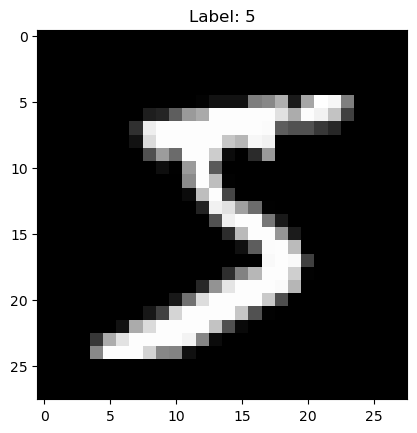

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MINST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Inspect the shape of the data
print(f"Training data shape: {train_images.shape}, Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [14]:
# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
# Check that pixel values are scaled to [0, 1]
for name, imgs in (("train_images", train_images), ("test_images", test_images)):
    mn = imgs.min()
    mx = imgs.max()
    print(f"{name}: min={mn:.6f}, max={mx:.6f}, dtype={imgs.dtype}")
    if mn < 0 or mx > 1:
        print(f"  -> {name} has values outside [0, 1]")
    else:
        print(f"  -> {name} OK: all values within [0, 1]")

# Strict checks (will raise if range violated)
assert train_images.min() >= -1e-8 and train_images.max() <= 1 + 1e-8, "train_images not in [0,1]"
assert test_images.min() >= -1e-8 and test_images.max() <= 1 + 1e-8, "test_images not in [0,1]"

train_images: min=0.000000, max=1.000000, dtype=float64
  -> train_images OK: all values within [0, 1]
test_images: min=0.000000, max=1.000000, dtype=float64
  -> test_images OK: all values within [0, 1]


In [22]:
import tensorflow as tf
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Check the shape of train_images and train_labels
print(f"train_images shape: {train_images.shape}")
print(f"train_labels shape: {train_labels.shape}")

# Check that they both have 60,000 samples
assert train_images.shape[0] == train_labels.shape[0], "Number of images and labels do not match!"

# If the shapes are correct, you can proceed with splitting the data
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Verify the split data shapes
print(f"Train images shape: {train_images.shape}, Train labels shape: {train_labels.shape}")
print(f"Validation images shape: {val_images.shape}, Validation labels shape: {val_labels.shape}")


train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
Train images shape: (48000, 28, 28), Train labels shape: (48000,)
Validation images shape: (12000, 28, 28), Validation labels shape: (12000,)


In [23]:
#splitting data set into training and testing
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(train_images.reshape(-1, 28, 28, 1))  # Reshape for compatibility

In [25]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #Flatten layer
    tf.keras.layers.Dense(128, activation='relu'), #Hidden layer
    tf.keras.layers.Dense(10, activation='softmax') #Output layer
])

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [27]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8018 - loss: 9.0292 - val_accuracy: 0.8896 - val_loss: 0.6320
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8972 - loss: 0.4671 - val_accuracy: 0.8969 - val_loss: 0.4993
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9191 - loss: 0.3341 - val_accuracy: 0.9069 - val_loss: 0.3748
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9257 - loss: 0.2903 - val_accuracy: 0.9240 - val_loss: 0.3342
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9334 - loss: 0.2560 - val_accuracy: 0.9177 - val_loss: 0.4291
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9381 - loss: 0.2497 - val_accuracy: 0.9326 - val_loss: 0.2980
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9432 - loss: 0.2230 - val_accuracy: 0.9264 - val_loss: 0.3886
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9503 - loss: 0.1988 - 

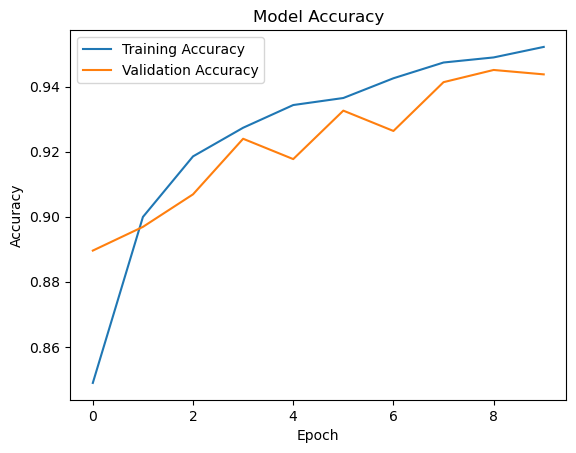

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

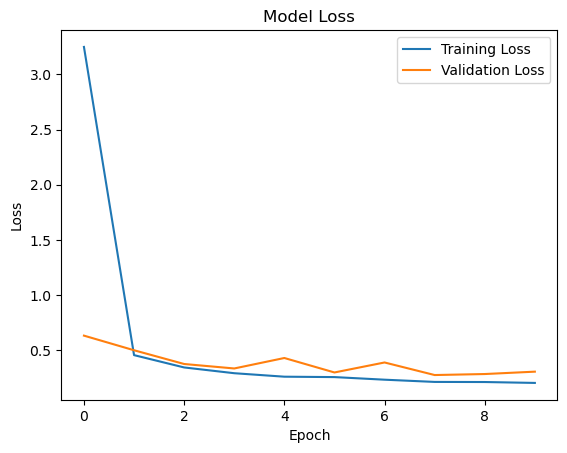

In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9296 - loss: 0.4109
Test Accuracy: 0.9411


In [31]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[0.0000000e+00 1.9459078e-17 7.2722675e-11 6.5278822e-09 3.7060859e-27
 4.9674634e-22 0.0000000e+00 1.0000000e+00 4.9055457e-38 2.7827729e-25]
